In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud 
import wordcloud
import functools
from plotly import express as px
import numpy as np 
import pandas as pd
import seaborn as sns
import random
import json
import os
import wordcloud
import functools
import nltk
import requests

from matplotlib import pyplot as plt
from urllib.request import urlopen
from plotly import graph_objects as go
from plotly import express as px
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [4]:
airbnb=pd.read_csv('/Users/nasrakhalif/Desktop/BI coursework/airbnb/Airbnb dataset/AB_NYC_2019.csv')

In [5]:
#Check columns
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#check all the data is present
airbnb.shape

(48895, 16)

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [8]:
#check null values in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

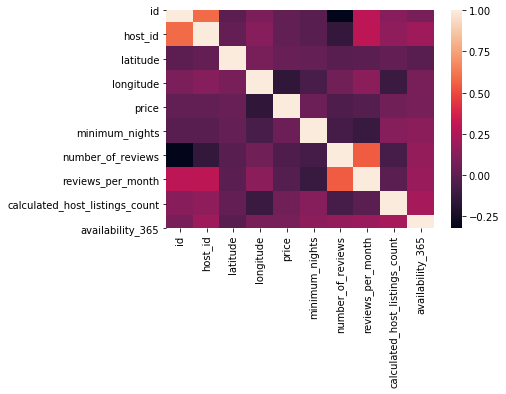

In [9]:
corr = airbnb.corr()
sns.heatmap(corr)

In [10]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Data Cleaning

In [11]:
#Fill in the missing values with 0
airbnb[airbnb['reviews_per_month'].isna()] = 0

In [12]:
#Remove "empty records"
airbnb= airbnb[airbnb['price'] != 0]


In [13]:
print(f"Number of records after cleaning: {airbnb.count()[0]}")

Number of records after cleaning: 38833


# Price

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



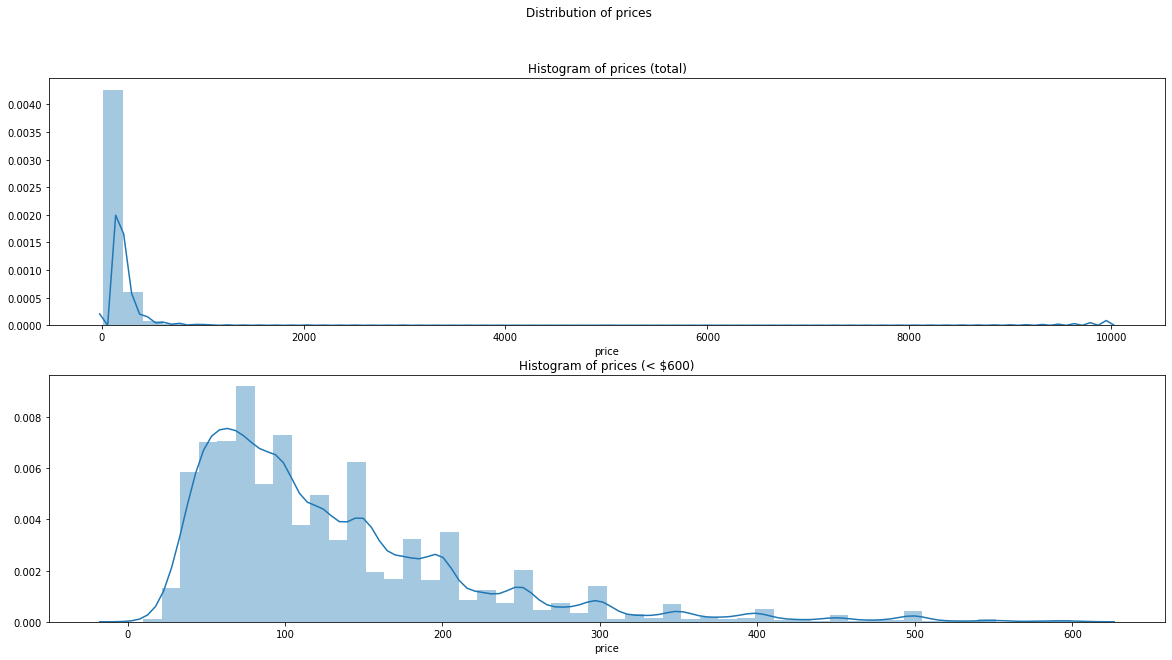

In [18]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(airbnb['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $600)")
sns.distplot(airbnb[airbnb['price'] < 600]['price'], kde=True, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

Text(0.5, 0, 'Price')

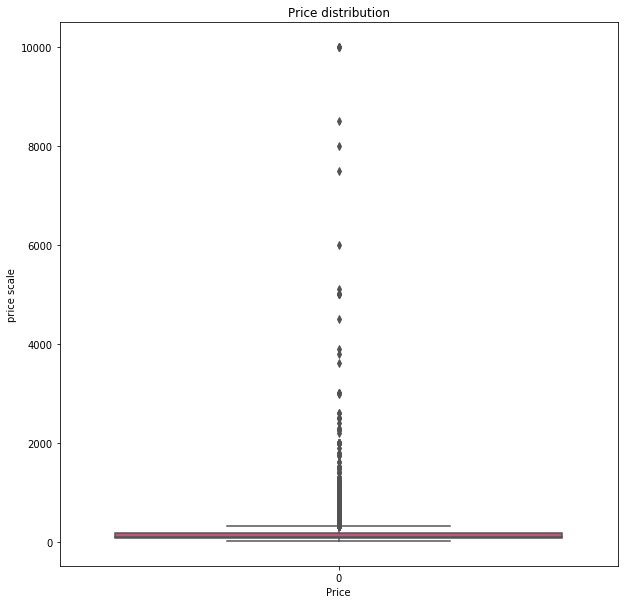

In [21]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb['price'],palette='plasma')
plt.title('Price distribution')
plt.ylabel('price scale')
plt.xlabel('Price')

In [86]:
#Distribution of price in neighbourhoods
df = airbnb.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)
df = df[:20]

<function matplotlib.pyplot.show(*args, **kw)>

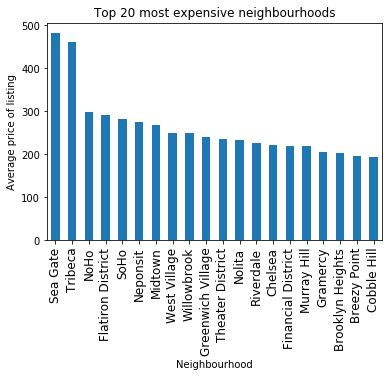

In [87]:
v1=df.plot(kind='bar')
v1.set_title('Top 20 most expensive neighbourhoods')
v1.set_ylabel('Average price of listing')
v1.set_xlabel('Neighbourhood')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

In [24]:
df = airbnb.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean().sort_values(ascending=False)
df = df[:20]
df

neighbourhood       neighbourhood_group
Sea Gate            Brooklyn               482.500000
Tribeca             Manhattan              460.300000
NoHo                Manhattan              298.451613
Flatiron District   Manhattan              291.482759
SoHo                Manhattan              281.303136
Neponsit            Queens                 274.666667
Midtown             Manhattan              267.583164
West Village        Manhattan              250.326230
Willowbrook         Staten Island          249.000000
Greenwich Village   Manhattan              239.074919
Theater District    Manhattan              236.182432
Nolita              Manhattan              233.616505
Riverdale           Bronx                  226.857143
Chelsea             Manhattan              221.792271
Financial District  Manhattan              218.750491
Murray Hill         Manhattan              218.083601
Gramercy            Manhattan              205.193916
Brooklyn Heights    Brooklyn              

In [88]:
#Distribution of price in neighbourhood groups
df = airbnb.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)
df

neighbourhood_group
Manhattan        180.052489
Brooklyn         121.515209
Queens            95.762571
Staten Island     89.964968
Bronx             79.644571
Name: price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

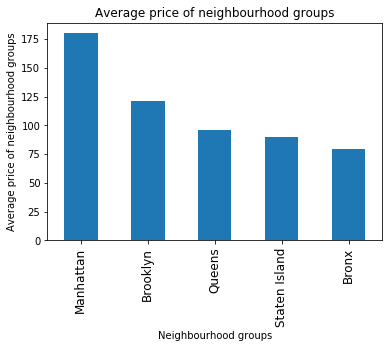

In [89]:
v1=df.plot(kind='bar')
v1.set_title('Average price of neighbourhood groups')
v1.set_ylabel('Average price of neighbourhood groups')
v1.set_xlabel('Neighbourhood groups')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

In [90]:
#Price depending on room types
df = airbnb.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
df

room_type
Entire home/apt    196.303723
Private room        84.014384
Shared room         63.363744
Name: price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

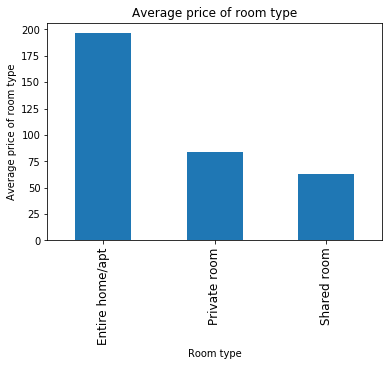

In [91]:
v1=df.plot(kind='bar')
v1.set_title('Average price of room type')
v1.set_ylabel('Average price of room type')
v1.set_xlabel('Room type')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

Text(0.5, 1.0, 'Airbnb room type in New York')

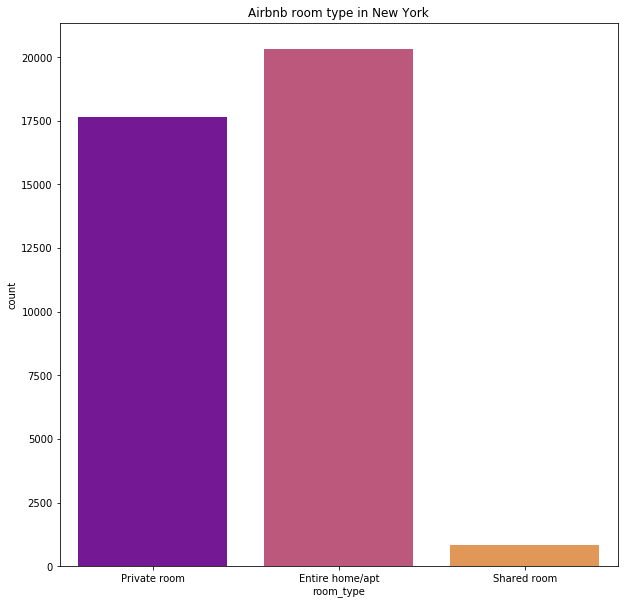

In [25]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Airbnb room type in New York')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


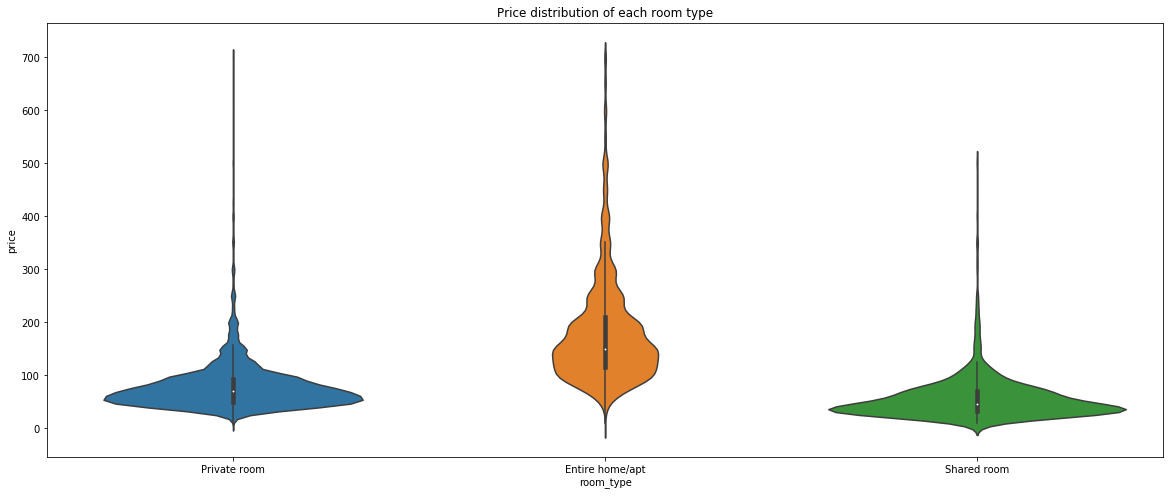

In [99]:
fig, ax= plt.subplots(figsize=(20,8))
sns.violinplot(data=airbnb[airbnb['price'] <= 700], x="room_type", y="price", ax=ax)
ax.set_title('Price distribution of each room type')
fig.show()

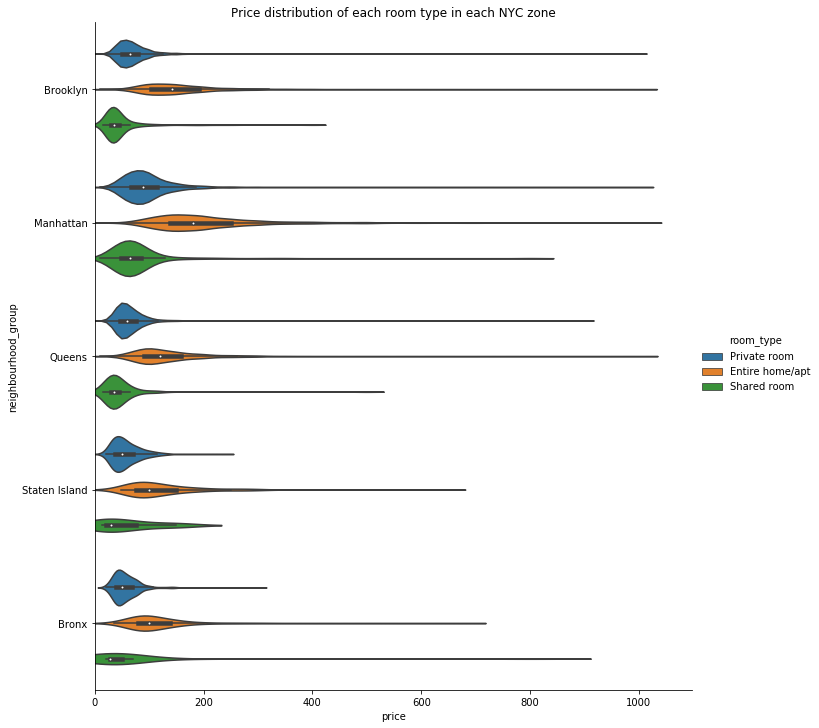

In [102]:
V = sns.catplot(data=airbnb[airbnb['price'] <= 1000], x="price", y="neighbourhood_group", hue="room_type", kind='violin', height=10)
V.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.show()

In [111]:
#Price depending on number of reviews
px.scatter(airbnb[airbnb['price'] <= 800], x='reviews_per_month', y='price', color='room_type', 
                title='Price and number of reviews')


In [112]:
#price and number of nights
airbnb['minimum_nights'].describe()

count    38833.000000
mean         5.867561
std         17.386070
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [119]:
print('Mean of minimum_nights: ', round(airbnb['minimum_nights'].mean()))
print ('Mode of minimum_nights: ', airbnb['minimum_nights'].mode()[0])

Mean of minimum_nights:  6
Mode of minimum_nights:  2


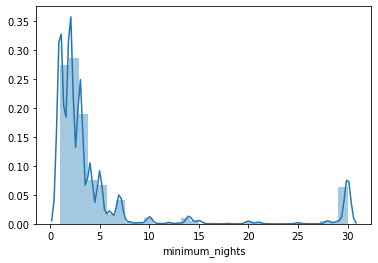

In [127]:
sns.distplot(airbnb[(airbnb['minimum_nights'] <= 30) & (data['minimum_nights'] > 0)]
             ['minimum_nights'], bins=31
         )

In [153]:
df = airbnb[airbnb['minimum_nights'] < 31].groupby('minimum_nights')['price'].median()


<function matplotlib.pyplot.show(*args, **kw)>

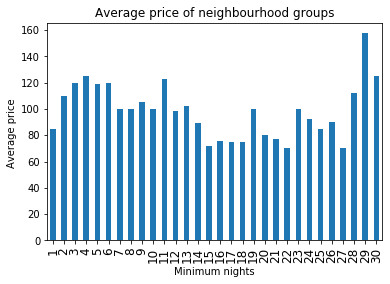

In [154]:
v1=df.plot(kind='bar')
v1.set_title('Average price of neighbourhood groups')
v1.set_ylabel('Average price ')
v1.set_xlabel('Minimum nights')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

In [ ]:
#Hosts

In [156]:
host_listings_count = airbnb.groupby('host_id')['calculated_host_listings_count'].mean().sort_values(ascending=False)
host_listings_count

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
46785121       1
46786142       1
46787065       1
46801421       1
2438           1
Name: calculated_host_listings_count, Length: 30250, dtype: int64

In [157]:
host_listings_count.describe()

count    30250.000000
mean         1.363636
std          3.059743
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [158]:
professionals = host_listings_count[:20]

<function matplotlib.pyplot.show(*args, **kw)>

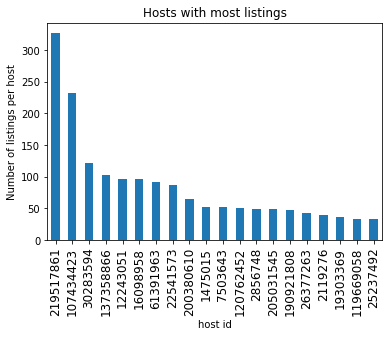

In [159]:
v1=professionals.plot(kind='bar')
v1.set_title('Hosts with most listings')
v1.set_ylabel('Number of listings per host')
v1.set_xlabel('host id')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

In [216]:
biggest_host = airbnb[airbnb['host_id'] == 219517861]
biggest_host


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,2019-06-08,0.94,327,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44346,34183895,Sonder | Stock Exchange | Intimate 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70630,-74.01254,Entire home/apt,247,2,4,2019-06-23,2.35,327,232
44534,34284409,Sonder | 116 John | Modern Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70825,-74.00482,Entire home/apt,100,29,1,2019-06-06,0.88,327,358
44670,34341994,Sonder | 116 John | Polished 2BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70781,-74.00525,Entire home/apt,179,29,1,2019-06-24,1.00,327,339
45148,34566104,Sonder | Stock Exchange | Warm Studio + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70598,-74.01069,Entire home/apt,222,2,1,2019-05-29,0.73,327,315


In [16]:
biggest_second_host = airbnb[airbnb['host_id'] == 107434423]
biggest_second_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
32788,25823670,"Adorable UES Studio w/ Balcony, Gym + Doorman ...",107434423,Blueground,Manhattan,Upper East Side,40.77669,-73.95673,Entire home/apt,211,30,1,2019-02-28,0.23,232,201
34048,26982403,Enchanting 1BR near Times Sq w/ Indoor pool + ...,107434423,Blueground,Manhattan,Theater District,40.76196,-73.98536,Entire home/apt,280,30,2,2019-05-16,0.36,232,218
35411,28095496,"Roomy FiDi 1BR w/ Gym, Roof deck + Doorman by ...",107434423,Blueground,Manhattan,Financial District,40.70427,-74.00964,Entire home/apt,285,30,1,2018-11-03,0.12,232,324
35685,28329243,"Attractive FiDi 1BR w/ Office nook + Gym, Door...",107434423,Blueground,Manhattan,Battery Park City,40.70438,-74.01708,Entire home/apt,263,30,1,2018-10-23,0.12,232,327
36770,29225254,Clever Midtown West 1BR w/ Gym + Doorman by Bl...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76125,-73.99546,Entire home/apt,264,30,1,2019-01-10,0.17,232,187
36771,29225417,"Large UWS 1BR w/ Stunning Gym, Doorman + Rooft...",107434423,Blueground,Manhattan,Upper West Side,40.78892,-73.97402,Entire home/apt,244,30,1,2019-01-31,0.19,232,218
37943,30006962,"Sharp Wall Street 1BR w/ Gym, Doorman, Roof de...",107434423,Blueground,Manhattan,Financial District,40.70497,-74.00746,Entire home/apt,267,30,1,2019-03-20,0.27,232,189
37993,30030480,Charming West Village Studio w/ Gym + Doorman ...,107434423,Blueground,Manhattan,West Village,40.72943,-74.00243,Entire home/apt,269,30,1,2019-01-05,0.16,232,234


In [17]:
third_host = airbnb[airbnb['host_id'] == 30283594]
third_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,2017-12-31,0.07,121,161
10531,8081037,Lavish Studio with Great Amenities in FiDi,30283594,Kara,Manhattan,Financial District,40.70550,-74.00812,Entire home/apt,189,30,4,2019-01-28,0.11,121,365
10643,8185845,1-Bedroom Upper East Side Apartment!,30283594,Kara,Manhattan,Upper East Side,40.76391,-73.95938,Entire home/apt,249,30,2,2018-07-28,0.10,121,273
10803,8319784,~Lavish 1 Bedroom Upper East Side NYC Apt!,30283594,Kara,Manhattan,Upper East Side,40.76483,-73.95801,Entire home/apt,249,30,1,2017-06-29,0.04,121,273
10804,8320129,Cozy Studio Apt Upper East Side Near Hospitals,30283594,Kara,Manhattan,Upper East Side,40.76137,-73.96042,Entire home/apt,199,30,3,2018-04-22,0.11,121,365
11572,9003691,Luxury Studio Apartment in NYC'S Chelsea District,30283594,Kara,Manhattan,Chelsea,40.74490,-73.99167,Entire home/apt,109,30,1,2016-10-31,0.03,121,184
11601,9026485,Luxury Studio Apt in NYC Financial District!,30283594,Kara,Manhattan,Financial District,40.70776,-74.01514,Entire home/apt,169,30,2,2016-06-28,0.05,121,364
11621,9043722,Lavish 1BR in FiDi + city views,30283594,Kara,Manhattan,Financial District,40.70574,-74.00809,Entire home/apt,239,30,2,2018-06-10,0.09,121,186
12986,9858642,NYC Midtown West 2-BR Apt near Theater District!,30283594,Kara,Manhattan,Midtown,40.76704,-73.98153,Entire home/apt,369,30,1,2016-01-20,0.02,121,345


In [191]:
prof_price =  airbnb.groupby(['host_id'])['calculated_host_listings_count','price'].mean().reset_index()

prof_price = prof_price.sort_values('calculated_host_listings_count', ascending=False)

prof_price = prof_price[:20]



<function matplotlib.pyplot.show(*args, **kw)>

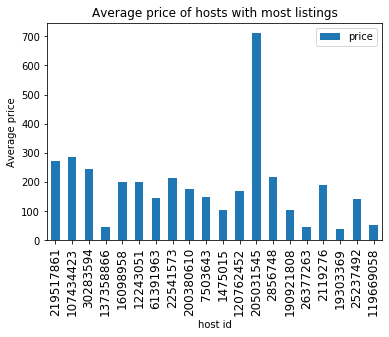

In [192]:
v1=prof_price.plot('host_id','price',kind='bar')
v1.set_title('Average price of hosts with most listings')
v1.set_ylabel('Average price')
v1.set_xlabel('host id')
v1.set_xticklabels(v1.get_xticklabels(), rotation='vertical', size = 12)
plt.show

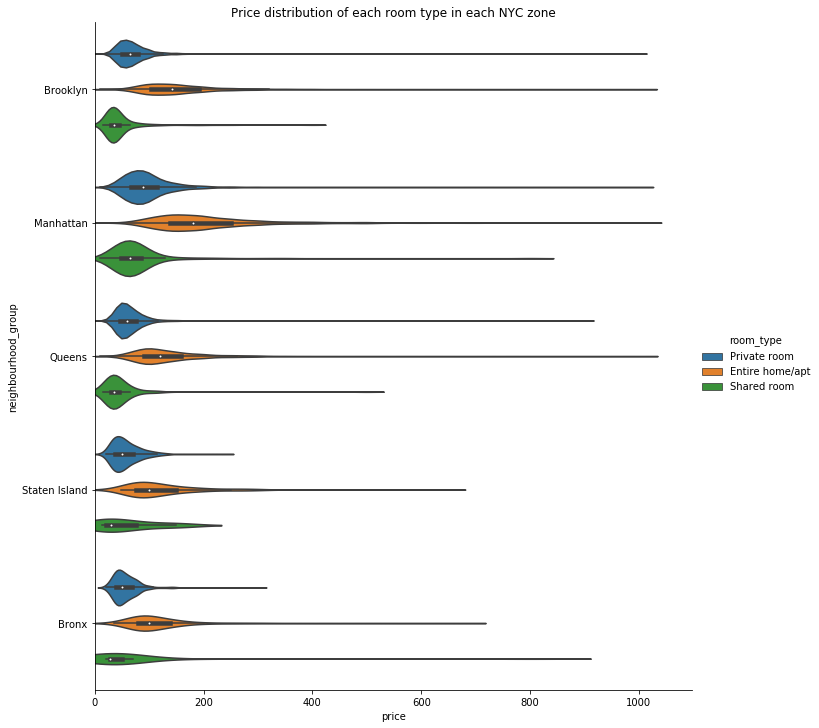

In [14]:
V = sns.catplot(data=airbnb[airbnb['price'] <= 1000], x="price", y="neighbourhood_group", hue="room_type", kind='violin', height=10)
V.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.show()

In [49]:
#delete columns that are not necessary or for data protection
airbnb.drop(['host_id','id','host_name','last_review'], axis=1, inplace=True)

In [50]:
#examine the changes
airbnb.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [85]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [14]:
airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [15]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

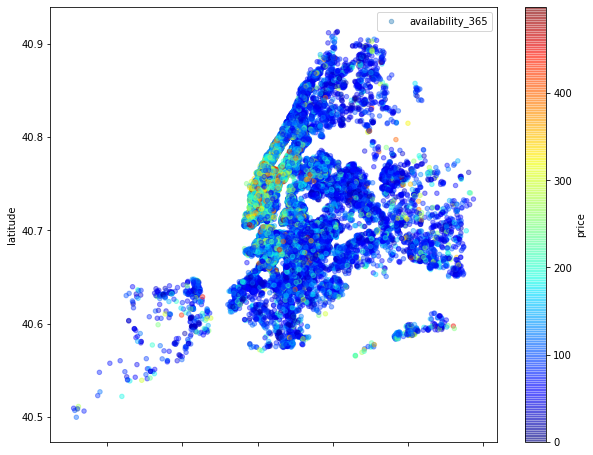

In [18]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
sub_6=airbnb[airbnb.price < 500]
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [21]:
pip install wordcloud

     |████████████████████████████████| 163kB 4.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
 from wordcloud import WordCloud 

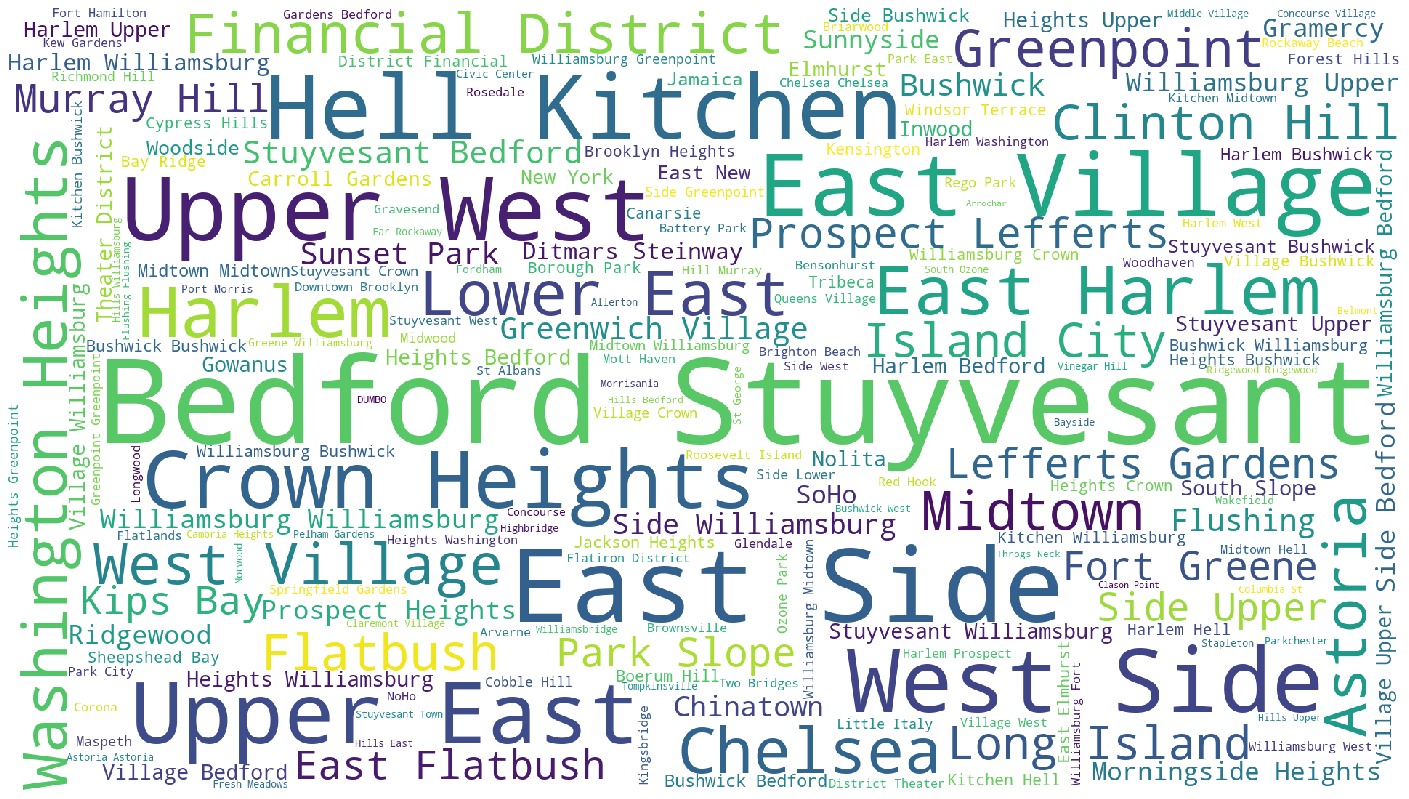

In [23]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Text(0.5, 1.0, 'Airbnb room type in New York')

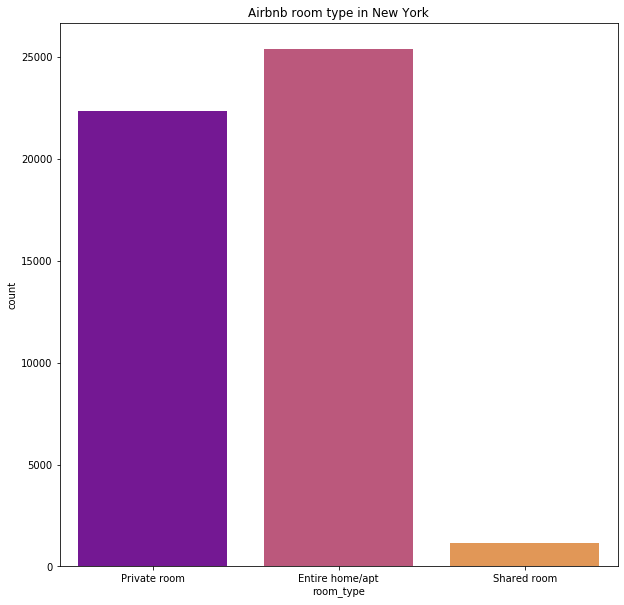

In [24]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Airbnb room type in New York')

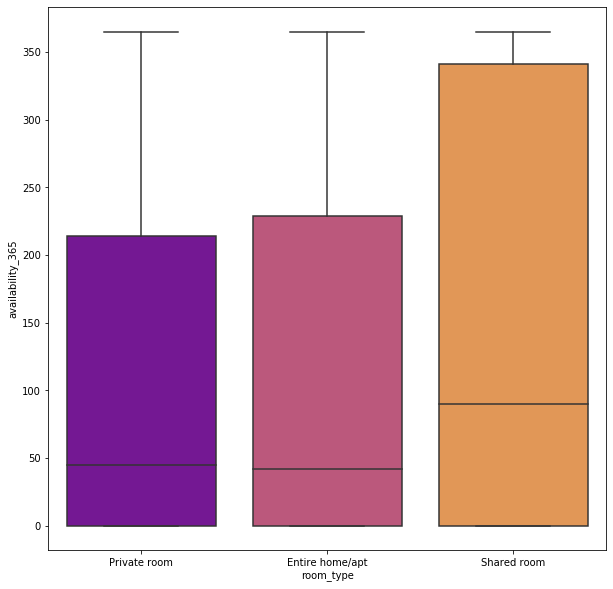

In [25]:
#relationship between rooom type and availablity >> this shows taht even though the numbers of shared room is significantly less, 
#they are also occupied less
ax = sns.boxplot(data=airbnb, x='room_type',y='availability_365',palette='plasma')

Text(0.5, 1.0, 'Neighbourhood Group')

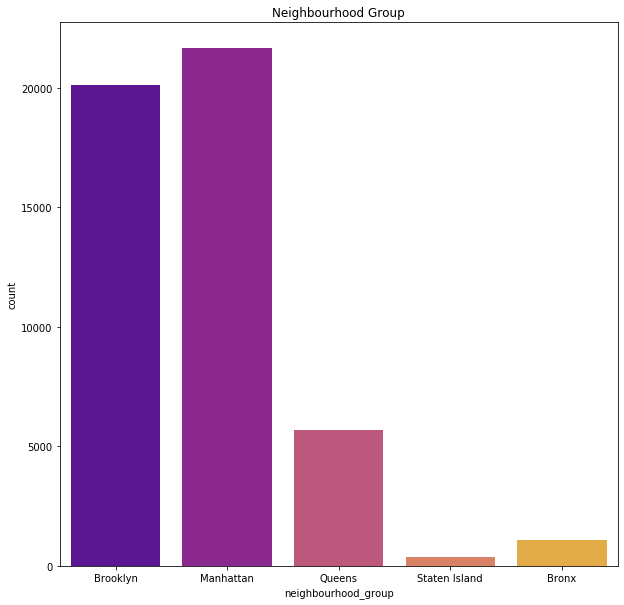

In [26]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

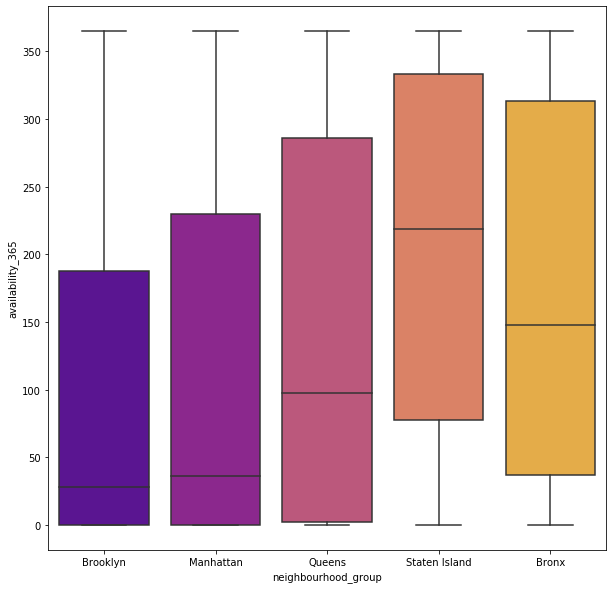

In [27]:
# this shows that bronx, staten island and queens are not desirable

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

In [30]:
airbnb['price'].groupby(airbnb["neighbourhood_group"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.50,106.71,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.38,186.87,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.88,291.38,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.52,167.10,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0


In [ ]:
#Manhattan is the most expensive region, with US$ 196.88 as a mean value.

#Bronx is the less expensive region, with US$ 87.50 as a mean value.

In [31]:
airbnb['price'].groupby(airbnb["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.79,284.04,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.78,160.21,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.13,101.73,0.0,33.0,45.0,75.0,1800.0


In [ ]:
#Entire home/apt is the most expensive room type with US$ 211.79.

#Shared Room is the less expansive room type with US$ 70.13.
